# <font color='darkred'>CSV Puzzle Solution - Nathaniel Smith</font>
### <font color='darkblue'>Welcome! Browsing the web a download link to a basic two-column .csv "puzzle" which I believed I solved below. This file is the documentation on how I did it, with respective credit to the developers of the libraries utlized. A python file is included in the git repo to reproduce my  work.</font>

#### As soon as I saw the file was two columns of numbers, my mind immediately went to coordinates. After simply graphing the points and modifying their orientation, it became clear it was a map of some sorts.

##### <font color='blue'>Access the coordinates puzzle and import into pandas dataframe:</font>

In [1]:
import pandas as pd

headers = ['lat', 'lng']
df = pd.read_csv("https://drive.google.com/uc?export=download&id=10h4D4vqqlr-F0g9Ch20GQ7C1oxx3RL33", names=headers)
df.plot.scatter('lat', 'lng')

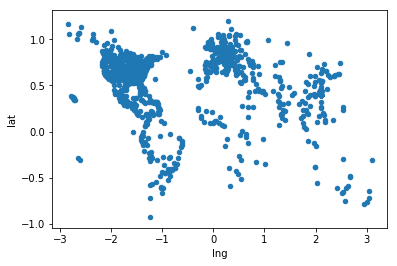

In [2]:
df.plot.scatter('lng', 'lat')

### <font color='navy'>It became clear I would need to plot the points with a more detailed map.</font>

#### After exploring multiple  libraries to map coordinates, I chose folium, a lightweight library to make simple interactive HTML maps. Before deciding on this, I experimented with basemap and matplotlib.
##### <font color='blue'>Import the appropriate python libraries:</font>

In [3]:
import folium
import math
import pandas as pd
from IPython.display import HTML

#### <font color='blue'>To display the maps in this document, I created the following function:</font>

In [4]:
def show(folmap):
    """Displays in the notebook a folium.folium.Map object.
    """
    folmap.render()
    iframe = folmap._repr_html_()
    return HTML(iframe)

#### <font color='blue'>To plot the coordinates from the original file onto a folium object, I created the following function:</font>

In [5]:
def plotPoints(df, map):
    for i in range(len(df)):
        """ plots all points in a dataframe in folium, which generates an HTML file with all \
        points plotted on an interactive, lightweight map."""
        x = df['lat'][i]
        y = df['lng'][i]
        marker = folium.CircleMarker(location=[x, y])
        marker.add_to(map)

#### <font color='blue'>The following executes mapping the coordinates:</font>

In [6]:
folmap = folium.Map(location=[0, 0], zoom_start=3, tiles="CartoDB positron")
plotPoints(df, folmap)
show(folmap)

### <font color='navy'>After attempting to plot the points unmodified, it became clear they were "shrunk" by an unknown value, as seen above.</font>
#### <font color='blue'>I then created the function below to expand all the coordinates:</font>

In [7]:
def expandCoords(df, multiplier):
    # multiplies all coordinates in dataframe by a given multiplier.
    for x in range(len(df)):
        df['lat'][x] = (df['lat'][x] * multiplier)
        df['lng'][x] = (df['lng'][x] * multiplier)

### <font color='navy'>After doing numerous tests which won't be shown in this notebook, it became clear the mulitplier was in relation to radians, so I concluded it to be 180/pi. </font>

In [8]:
mult = 180/math.pi

expandCoords(df, mult)
print(df.head(n=5))

         lat         lng
0  22.755002  121.101998
1  22.755002  121.101998
2  22.755002  121.101998
3  22.755002  121.101998
4  22.755002  121.101998


### <font color='navy'>Replotting the points after expansion, the following is produced:</font>

In [9]:
newfolmap = folium.Map(location=[42.366083, -71.082194], zoom_start=2, tiles="CartoDB positron")
plotPoints(df, newfolmap)
show(newfolmap)

### <font color='darkblue'>At any point in the above map is a respective airport. While there are 17,678 commerical airports in the world, it's likely that these 1,024 airports are ones that popular commercial airlines service. </font>